### Name: Rupesh Kumar Nirala
<B> Program: Global Certificate in Data Science <BR>
Assignment: Term 1 & Term 2 : Data Analysis with Python & EDA - April'2020 </B>


## Problem Statement
Facebook has become quite popular in the recent few years with people all over the world using it as a medium to share their status, thoughts and pictures with their friends. With the mobile app, it has become even more popular and easier to access. People from all age groups are connected to Facebook, however there are certain differences in their way of using it such as with respect to initiating friendships and sending likes. We are trying to study the dataset provided to identify certain patterns with respect to how the users are making use of this most popular social networking app depending on their age group, gender etc.

#### Load Standard Python libraries 

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline 

#### Load csv file from the data source & show the sample data


In [2]:
facebook_df = pd.read_csv("https://github.com/insaid2018/Term-1/raw/master/Data/Projects/facebook_data.csv")
facebook_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


#### Create profiling Report

In [3]:
profile = ProfileReport(facebook_df, title="Facebook Data Before Pandas Profiling Report")
profile.to_file("Facebook_Data_before.html")

#### profiling Report Analysis:
#### Missing Values
gender: 175 (0.176762%) <BR>
tenure: 2 (0.002020%) <BR>
###### Observation: We can remove these values as they are not in significant in number.

#### Unique - 
Unique: userid has unique values
###### Observation: Unique identifier which is of no use for our EDA.

#### High correlation
High correlation: dob_year is highly correlated with age <BR>
High correlation: age is highly correlated with dob_year <BR>
High correlation: mobile_likes_received is highly correlated with likes_received <BR>
High correlation: likes_received is highly correlated with mobile_likes_received and 1 other fields <BR>
High correlation: www_likes_received is highly correlated with likes_received <BR>
###### Observation: These data looks obvious

#### Skewedness
Skewed: likes_received is highly skewed (γ1 = 112.0745682) <BR> 
Skewed: mobile_likes_received is highly skewed (γ1 = 107.5312999) <BR> 
Skewed: www_likes_received is highly skewed (γ1 = 126.257317) <BR> 

###### Observation: We have extreme values in likes_received which can because of some viral posts

#### Some significant zeros to be investigated
friend_count has 1962 (2.0%) zeros <BR>
friendships_initiated has 2997 (3.0%) zeros <BR>
likes has 22308 (22.5%) zeros <BR>
likes_received has 24428 (24.7%) zeros <BR>
mobile_likes has 35056 (35.4%) zeros <BR>
mobile_likes_received has 30003 (30.3%) <BR>
zeros www_likes has 60999 (61.6%) zeros <BR>
www_likes_received has 36864 (37.2%) zeros <BR>

###### Observation: Need to do some more analysis on these high number of 0s in these fields.

In [4]:
facebook_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

##### Observation: All data types (float64(1), int64(13), object(1)) looks goos no need to typecast/change any data type 


#### Drop rows where we have nan (gender=175 and tenure=2)

In [5]:
facebook_df.shape

(99003, 15)

In [6]:
fd = facebook_df.dropna() 
fd.shape

(98826, 15)

#### Check the outliers in the data 

In [7]:
fd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
userid,98826.0,1.597069e+06,344011.420723,1000008.0,1298868.25,1596225.0,1895572.5,2193542.0
age,98826.0,3.721265e+01,22.524220,13.0,20.00,28.0,50.0,113.0
dob_day,98826.0,1.453311e+01,9.013865,1.0,7.00,14.0,22.0,31.0
dob_year,98826.0,1.975787e+03,22.524220,1900.0,1963.00,1985.0,1993.0,2000.0
dob_month,98826.0,6.284753e+00,3.529431,1.0,3.00,6.0,9.0,12.0
tenure,98826.0,5.356498e+02,454.258423,0.0,226.00,412.0,673.0,3139.0
friend_count,98826.0,1.963740e+02,387.463475,0.0,31.00,82.0,206.0,4923.0
friendships_initiated,98826.0,1.074801e+02,188.861581,0.0,17.00,46.0,117.0,4144.0
likes,98826.0,1.561118e+02,572.553504,0.0,1.00,11.0,81.0,25111.0
likes_received,98826.0,1.426654e+02,1388.990063,0.0,1.00,8.0,59.0,261197.0


##### Observation of Outlier data
1) Minimum dob_year = 1900 (Which makes maximum age=120 years where we have 113 year as maximun age WRT 2020) <BR>
2) Maximum dob_year = 2000 (Which make minimum age = 20 years where we have 13 years as minimum age WRT 2020) <BR>
3) Given Facebook data is from <B>year 2013 </B><BR>
4) Other data looks reasonable so no need to remove/clean any outlier data <BR>


### Observing distribution of different numerival columns

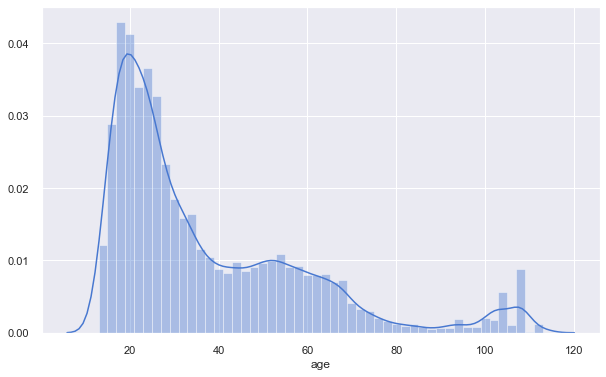

In [8]:
# Plot a histogram of the users ages
sns.set(color_codes=True)  
sns.set_palette(sns.color_palette("muted"))
f,ax = plt.subplots(figsize=(10,6))
sns.distplot(fd["age"], ax=ax);

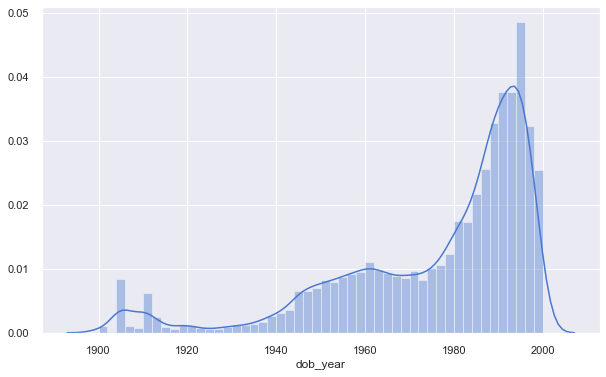

In [9]:
sns.set(color_codes=True)  
sns.set_palette(sns.color_palette("muted"))
f,ax = plt.subplots(figsize=(10,6))
sns.distplot(fd["dob_year"], ax=ax);

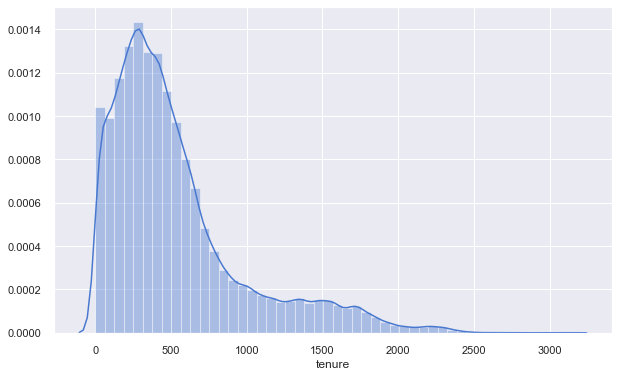

In [10]:
sns.set(color_codes=True)  
sns.set_palette(sns.color_palette("muted"))
f,ax = plt.subplots(figsize=(10,6))
sns.distplot(fd["tenure"], ax=ax);

##### Observation from distribution plot:
1) Maximun users ranges from Age <B>15 yrs to 35 yrs </B><BR>
2) Anothet active group ranges from <B>45 yrs to 70 yrs. </B><BR> 
3) Similar trends can be seen from DOB year <BR>
4) Most users are active from <B>0-1000 days </B>range. <BR>
5) ('friend_count', 'friendships_initiated', 'likes', 'likes_received','mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received') are <B>higly skewed</B> and no inference can be made based on the distribution plot <BR>

In [11]:
## Create Age Group based on the distribution of age data

facebook_df['age_group'] = pd.cut(facebook_df['age'].dropna(),
                         [13,18,25,35,45,70, 113],
                         labels=['<18','18-24','25-34','35-44','45-69', '70+'], include_lowest=True)

Text(0.5, 1.0, 'Age Group vs Gender')

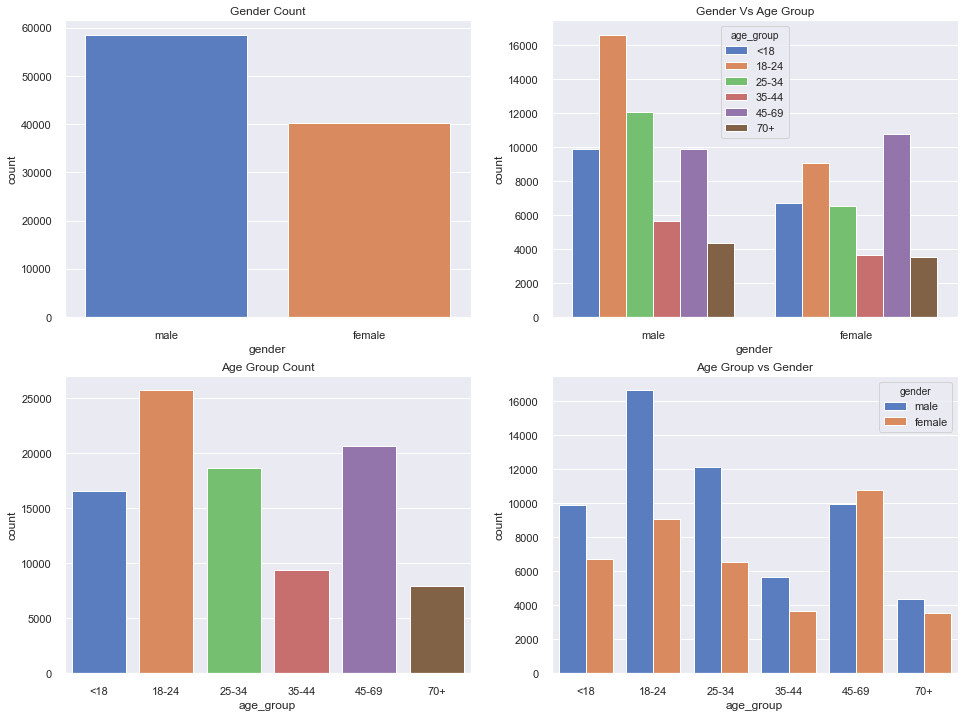

In [12]:
## User Count for Gender Vs Age Group
fd = facebook_df.dropna() 
fig,ax =plt.subplots(2, 2, figsize=(16,12))
sns.countplot(data = fd,x = 'gender', ax = ax[0,0])
sns.countplot(data = fd,x = 'gender', hue='age_group', ax = ax[0,1])
sns.countplot(data = fd,x = 'age_group', ax = ax[1,0])
sns.countplot(data = fd,x = 'age_group', hue='gender', ax = ax[1,1])

ax[0,0].set_title('Gender Count')
ax[0,1].set_title('Gender Vs Age Group')
ax[1,0].set_title('Age Group Count')
ax[1,1].set_title('Age Group vs Gender')

Text(0.5, 1.0, 'Female Age Group Count')

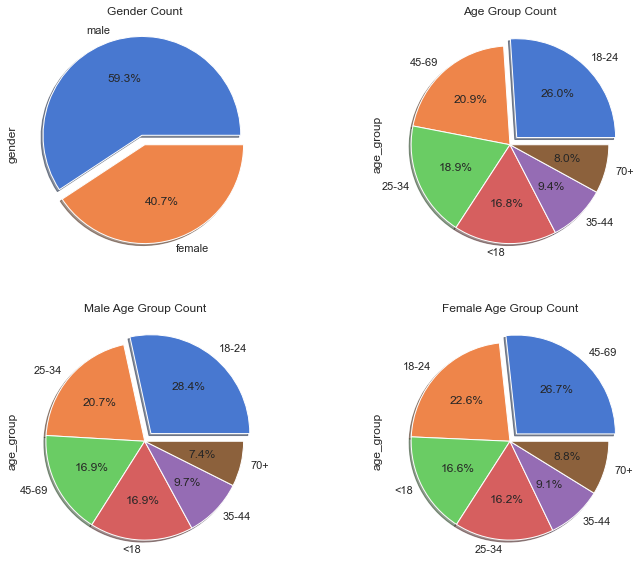

In [27]:
## User Count for Gender Vs Age Group
fd = facebook_df.dropna() 
fig,ax =plt.subplots(2, 2, figsize=(12,10))

data1 = fd['gender'].value_counts().sort_values(ascending=False)
data2 = fd['age_group'].value_counts().sort_values(ascending=False)
data3 = fd['age_group'][fd['gender'] == 'male'].value_counts().sort_values(ascending=False)
data4 = fd['age_group'][fd['gender'] == 'female'].value_counts().sort_values(ascending=False)

data1.plot.pie(explode=[0.1,0],autopct='%1.1f%%',ax=ax[0,0],shadow=True)
data2.plot.pie(explode=[0.1,0,0,0,0,0],autopct='%1.1f%%',ax=ax[0,1],shadow=True)
data3.plot.pie(explode=[0.1,0,0,0,0,0],autopct='%1.1f%%',ax=ax[1,0],shadow=True)
data4.plot.pie(explode=[0.1,0,0,0,0,0],autopct='%1.1f%%',ax=ax[1,1],shadow=True)
ax[0,0].set_title('Gender Count')
ax[0,1].set_title('Age Group Count')
ax[1,0].set_title('Male Age Group Count')
ax[1,1].set_title('Female Age Group Count')

#### Observation of numbers/percentage for Gender Vs Age Group : 
1) Male and Female ratio is almost <B>59.3% to 40.7% </B><BR>
2) In most of the age groups male is dominating but in age group <B>(45-69) </B>female number is more than male <BR>
2) In total sample <B>top 2</B> age groups are <B>(18-24) and (45-69)</B> <BR>
3) In males group  <B>top 2</B>age groups are <B>(18-24) and (25-34) </B><BR>
4) In Females group <B>top 2 </B>age groups are </B>(45-69) and (18-24)</B> <BR>
5) In overall and male/Female groups <B>bottom 2 </B> age groups are <B>(70+) and (35-44) </B><BR>


### like & likes_received analysis based on gender and age_group

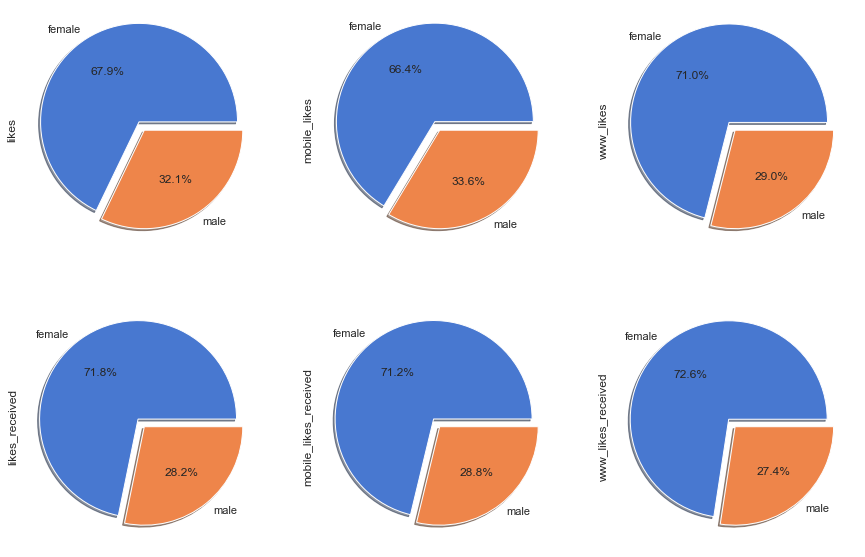

In [14]:
data1 = fd['likes'].groupby(fd.gender).sum().sort_values(ascending=False)
data2 = fd['mobile_likes'].groupby(fd.gender).sum().sort_values(ascending=False)
data3 = fd['www_likes'].groupby(fd.gender).sum().sort_values(ascending=False)
data4 = fd['likes_received'].groupby(fd.gender).sum().sort_values(ascending=False)
data5 = fd['mobile_likes_received'].groupby(fd.gender).sum().sort_values(ascending=False)
data6 = fd['www_likes_received'].groupby(fd.gender).sum().sort_values(ascending=False)

f,ax = plt.subplots(2,3, figsize=(15,10))
data1.plot.pie(explode=[0.1,0],autopct='%1.1f%%',ax=ax[0,0],shadow=True)
data2.plot.pie(explode=[0.1,0],autopct='%1.1f%%',ax=ax[0,1],shadow=True)
data3.plot.pie(explode=[0.1,0],autopct='%1.1f%%',ax=ax[0,2],shadow=True)
data4.plot.pie(explode=[0.1,0],autopct='%1.1f%%',ax=ax[1,0],shadow=True)
data5.plot.pie(explode=[0.1,0],autopct='%1.1f%%',ax=ax[1,1],shadow=True)
data6.plot.pie(explode=[0.1,0],autopct='%1.1f%%',ax=ax[1,2],shadow=True)


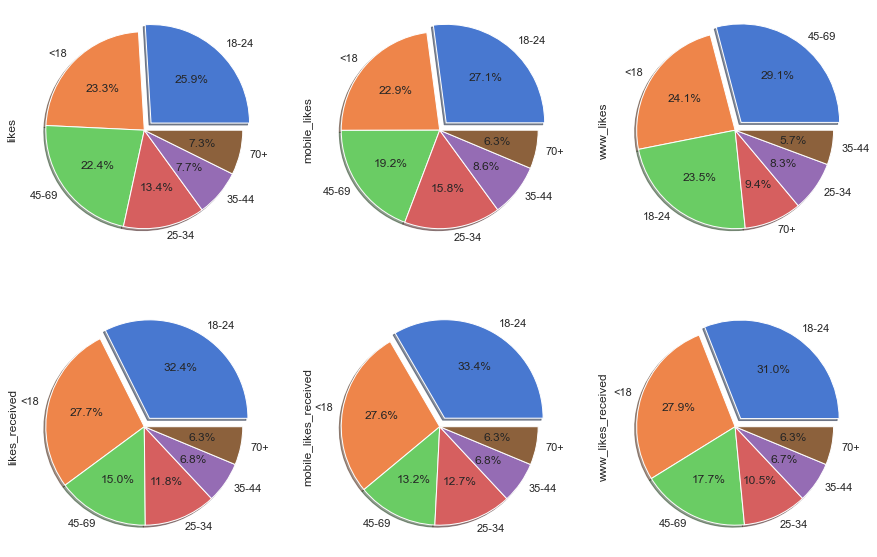

In [15]:
data1 = fd['likes'].groupby(fd.age_group).sum().sort_values(ascending=False)
data2 = fd['mobile_likes'].groupby(fd.age_group).sum().sort_values(ascending=False)
data3 = fd['www_likes'].groupby(fd.age_group).sum().sort_values(ascending=False)
data4 = fd['likes_received'].groupby(fd.age_group).sum().sort_values(ascending=False)
data5 = fd['mobile_likes_received'].groupby(fd.age_group).sum().sort_values(ascending=False)
data6 = fd['www_likes_received'].groupby(fd.age_group).sum().sort_values(ascending=False)

f,ax = plt.subplots(2,3, figsize=(15,10))
data1.plot.pie(explode=[0.1,0,0,0,0,0],autopct='%1.1f%%',ax=ax[0,0],shadow=True)
data2.plot.pie(explode=[0.1,0,0,0,0,0],autopct='%1.1f%%',ax=ax[0,1],shadow=True)
data3.plot.pie(explode=[0.1,0,0,0,0,0],autopct='%1.1f%%',ax=ax[0,2],shadow=True)
data4.plot.pie(explode=[0.1,0,0,0,0,0],autopct='%1.1f%%',ax=ax[1,0],shadow=True)
data5.plot.pie(explode=[0.1,0,0,0,0,0],autopct='%1.1f%%',ax=ax[1,1],shadow=True)
data6.plot.pie(explode=[0.1,0,0,0,0,0],autopct='%1.1f%%',ax=ax[1,2],shadow=True)

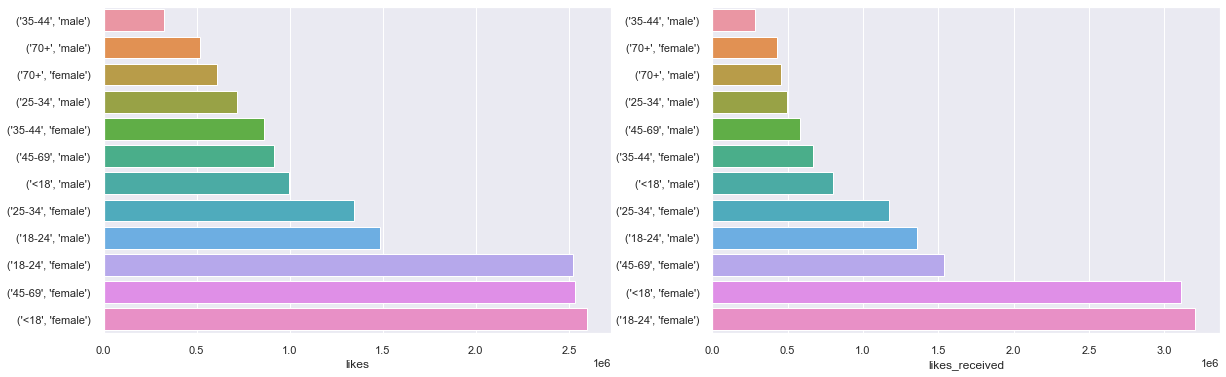

In [16]:
data1 = fd['likes'].groupby([fd.age_group,fd.gender]).sum().sort_values(ascending=True)
data2 = fd['likes_received'].groupby([fd.age_group,fd.gender]).sum().sort_values(ascending=True)
f,ax = plt.subplots(1,2,figsize=(20,6))
ax1 = sns.barplot(data1,data1.index,  ax = ax[0])
ax2 = sns.barplot(data2,data2.index,  ax = ax[1])

Text(0.5, 1.0, 'Total Likes - Female')

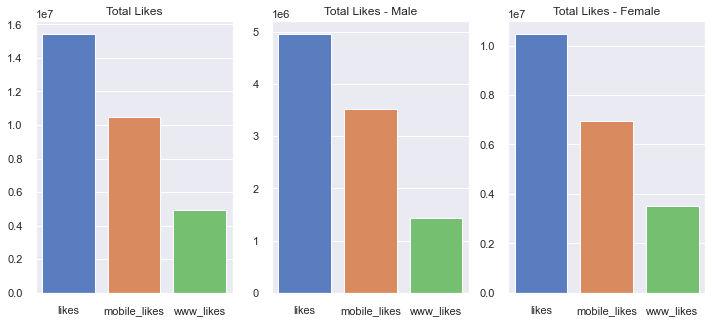

In [30]:
data1 = [[fd.likes.sum(), fd.mobile_likes.sum(), fd.www_likes.sum()]]

data2 = [[fd['likes'][fd['gender'] == 'male'].sum(), 
          fd['mobile_likes'][fd['gender'] == 'male'].sum(), 
          fd['www_likes'][fd['gender'] == 'male'].sum()]]

data3 = [[fd['likes'][fd['gender'] == 'female'].sum(), 
          fd['mobile_likes'][fd['gender'] == 'female'].sum(), 
          fd['www_likes'][fd['gender'] == 'female'].sum()]]

df1 = pd.DataFrame(data1, columns = ['likes','mobile_likes', 'www_likes']) 
df2 = pd.DataFrame(data2, columns = ['likes','mobile_likes', 'www_likes']) 
df3 = pd.DataFrame(data3, columns = ['likes','mobile_likes', 'www_likes']) 

f,ax = plt.subplots(1,3,figsize=(12,5))
sns.barplot(data = df1, ax=ax[0])
sns.barplot(data = df2, ax=ax[1])
sns.barplot(data = df3, ax=ax[2])

ax[0].set_title('Total Likes')
ax[1].set_title('Total Likes - Male')
ax[2].set_title('Total Likes - Female')

In [18]:
data1 = ((fd['likes'][fd['likes'] == 0].value_counts())/(fd.count()['likes']))*100
data2 = ((fd['mobile_likes'][fd['mobile_likes'] == 0].value_counts())/(fd.count()['mobile_likes']))*100
data3 = ((fd['www_likes'][fd['www_likes'] == 0].value_counts())/(fd.count()['www_likes']))*100

data4 = ((fd['likes_received'][fd['likes_received'] == 0].value_counts())/(fd.count()['likes_received']))*100
data5 = ((fd['mobile_likes_received'][fd['mobile_likes_received'] == 0].value_counts())/(fd.count()['mobile_likes_received']))*100
data6 = ((fd['www_likes_received'][fd['www_likes_received'] == 0].value_counts())/(fd.count()['www_likes_received']))*100

print ('O like done by {}% of users'.format(data1[0]))
print ('O mobile like done by {}% of users'.format(data2[0]))
print ('O www like done by {}% of users'.format(data3[0]))
print("\n")
print ('O like reciceived by {}% of users'.format(data4[0]))
print ('O mobile like reciceived by {}% of users'.format(data5[0]))
print ('O www like reciceived by {}% of users'.format(data6[0]))



O like done by 22.549733875700724% of users
O mobile like done by 35.417805031064695% of users
O www like done by 61.6588751947868% of users


O like reciceived by 24.68985894400259% of users
O mobile like reciceived by 30.319956286807116% of users
O www like reciceived by 37.262461295610464% of users


#### Observation for likes/likes_received Vs gender and age group:
1) Overall likes and likes_received data for female <B>(about 70%)</B> users are more than male users <B>(about 30%)</B> even after less number of female users <BR>
2) Age group <B>(<18 & 18-24)</B> are more active on facebook they likes and receive likes most <BR>
3) Three top most groups are females who likes most - <B> <18, 45-69, and 18-24 </B> <BR>
4) Three top most groups are female who received likes most - <B> 18-24, <18 and 45-69 </B><BR>
5) Three bottom groups who are less active in likes and likes_received - <B> 35-44(Males), 70+ (Male and Female) </B> <BR>
6) In all the likes <B>two third of likes are mobile likes</B> where only one third is www likes. <BR>
7) www likes top users are from <B>45-69</B> age group <BR>
##### 0 likes observation:
--- 0 like done by <B>22.54%</B> of all users <BR>
--- 0 mobile like done by <B>35.41%</B> of all users <BR>
--- 0 www like done by <B>61.65%</B> of all users <BR>
--- 0 like reciceived by <B>24.68%</B> of all users <BR>
--- 0 mobile like reciceived by <B>30.31%</B> of all users <BR>
--- 0 www like reciceived by <B>37.26%</B> of all users <BR>

### friend_count & friendships_initiated analysis based on gender and age_group

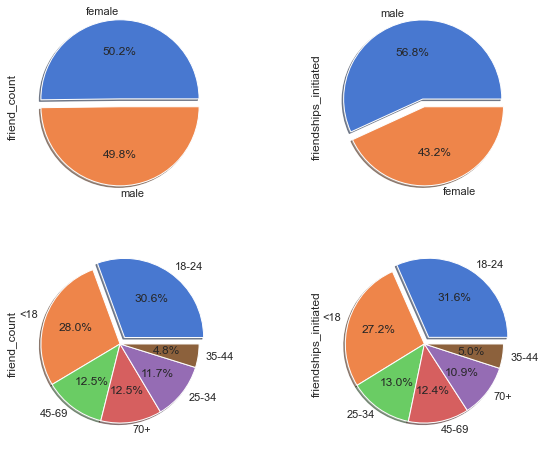

In [33]:
data1 = fd['friend_count'].groupby(fd.gender).sum().sort_values(ascending=False)
data2 = fd['friendships_initiated'].groupby(fd.gender).sum().sort_values(ascending=False)
data3 = fd['friend_count'].groupby(fd.age_group).sum().sort_values(ascending=False)
data4 = fd['friendships_initiated'].groupby(fd.age_group).sum().sort_values(ascending=False)
f,ax = plt.subplots(2,2,figsize=(10,8))
data1.plot.pie(explode=[0.1,0],autopct='%1.1f%%',ax=ax[0,0],shadow=True)
data2.plot.pie(explode=[0.1,0],autopct='%1.1f%%',ax=ax[0,1],shadow=True)
data3.plot.pie(explode=[0.1,0,0,0,0,0],autopct='%1.1f%%',ax=ax[1,0],shadow=True)
data4.plot.pie(explode=[0.1,0,0,0,0,0],autopct='%1.1f%%',ax=ax[1,1],shadow=True)


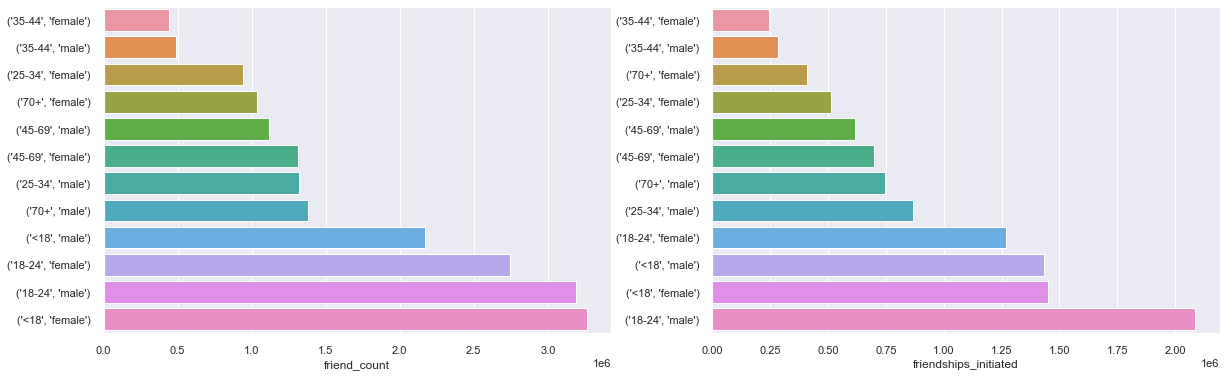

In [20]:
data1 = fd['friend_count'].groupby([fd.age_group,fd.gender]).sum().sort_values(ascending=True)
data2 = fd['friendships_initiated'].groupby([fd.age_group,fd.gender]).sum().sort_values(ascending=True)
f,ax = plt.subplots(1,2,figsize=(20,6))
ax1 = sns.barplot(data1,data1.index,  ax = ax[0])
ax2 = sns.barplot(data2,data2.index,  ax = ax[1])

In [21]:
data1 = ((fd['friend_count'][fd['friend_count'] == 0].value_counts())/(fd.count()['friend_count']))*100
data2 = ((fd['friendships_initiated'][fd['friendships_initiated'] == 0].value_counts())/(fd.count()['friendships_initiated']))*100

print ('O friend_count for {}% of users'.format(data1[0]))
print ('O friendships_initiated by {}% of users'.format(data2[0]))



O friend_count for 1.9853075101693887% of users
O friendships_initiated by 3.029567117964908% of users


#### Observation for friend_count /friendships_initiated Vs gender and age group:
1) Number of friends for male users and Female users are almost same <BR>. 
    -- Since total number of female users are less than male users so average friend count of females are more than males. <BR>
2) Age group <B> <18 & 18-24 </B> has highest number of friends <B>(almost 60%)</B> <BR>
3) Males have initiated more friendship request than female users <B>(57% Vs 43%)</B> <BR>
4) Age group <B> <18 & 18-24 </B> in Male and female both have most number of friends and friend request initiated. <BR>
5) Least active age group in both male and female is <B> 35-44 </B> <BR>


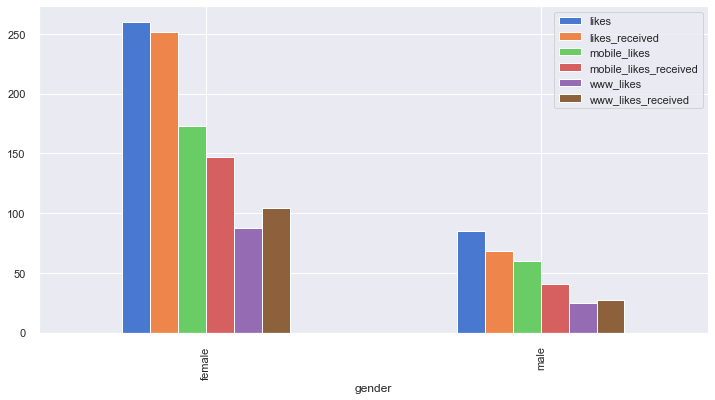

In [22]:

f,ax = plt.subplots(figsize=(12,6))
fd.pivot_table(values=['likes', 'likes_received','mobile_likes_received','mobile_likes','www_likes_received','www_likes'],index='gender').plot(kind='bar', ax=ax)

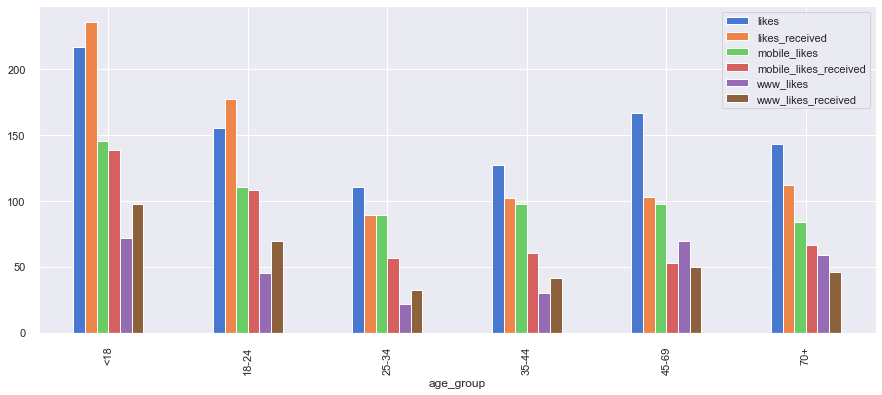

In [23]:
f,ax = plt.subplots(figsize=(15,6))
fd.pivot_table(values=['likes', 'likes_received','mobile_likes_received','mobile_likes','www_likes_received','www_likes'],
               index='age_group').plot(kind='bar',ax=ax)

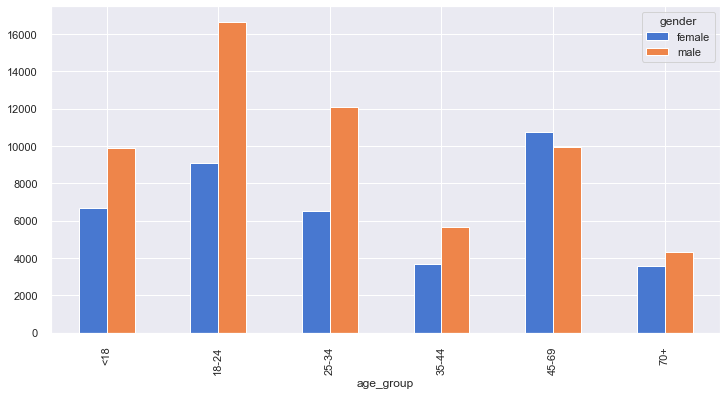

In [24]:
f,ax = plt.subplots(figsize=(12,6))
data1 = fd.groupby(['age_group', 'gender'])
data1.size().unstack().plot(kind='bar', ax=ax)